## Observa cómo descargamos un archivo FASTA que contiene varias secuencias

In [3]:
!wget http://biopython.org/DIST/docs/tutorial/examples/opuntia.fasta -O data/opuntia.fasta

--2015-11-09 11:31:26--  http://biopython.org/DIST/docs/tutorial/examples/opuntia.fasta
Resolving biopython.org... 54.243.166.98
Connecting to biopython.org|54.243.166.98|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7292 (7.1K)
Saving to: “data/opuntia.fasta”

100%[======================================>] 7,292       --.-K/s   in 0s      

2015-11-09 11:31:27 (510 MB/s) - “data/opuntia.fasta” saved [7292/7292]



In [4]:
!ls data

facturas.csv  opuntia.fasta  sampledata.csv


## Usamos CLUSTAL para el alineamiento múltiple de las secuencias y crear los árboles filogenéticos 

Observa que no usamos los _wrappers_ de **Biopython** sino que llamamos direcamente a CLUSTAL usando magics de Python

In [5]:
!clustalw2 -INFILE=data/opuntia.fasta -outfile=data/opuntia-clustal.phy -ALIGN -OUTPUT=PHYLIP




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: gi|6273291|gb|AF191665.1|AF191665   902 bp
Sequence 2: gi|6273290|gb|AF191664.1|AF191664   899 bp
Sequence 3: gi|6273289|gb|AF191663.1|AF191663   899 bp
Sequence 4: gi|6273287|gb|AF191661.1|AF191661   895 bp
Sequence 5: gi|6273286|gb|AF191660.1|AF191660   893 bp
Sequence 6: gi|6273285|gb|AF191659.1|AF191659   894 bp
Sequence 7: gi|6273284|gb|AF191658.1|AF191658   896 bp
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  99
Sequences (1:3) Aligned. Score:  99
Sequences (1:4) Aligned. Score:  98
Sequences (1:5) Aligned. Score:  98
Sequences (1:6) Aligned. Score:  98
Sequences (1:7) Aligned. Score:  98
Sequences (2:3) Aligned. Score:  99
Sequences (2:4) Aligned. Score:  98
Sequences (2:5) Aligned. Score:  98
Sequences (2:6) Aligned. Score:  98
Sequences (2:7) Aligned. Score:  98
Sequences (3:4) Aligned. Score:  98
Sequences (3:5) Aligned. Score:  98
Sequences (3:6) Aligned. Score:

In [2]:
from Bio import Phylo, AlignIO
%matplotlib inline
tree = Phylo.read('data/opuntia.dnd', 'newick')

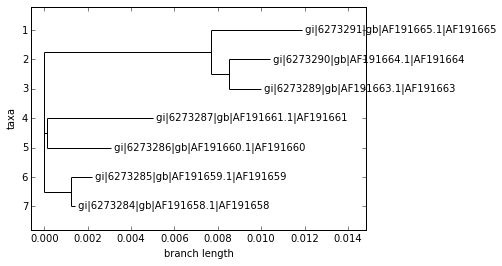

In [3]:
Phylo.draw(tree)

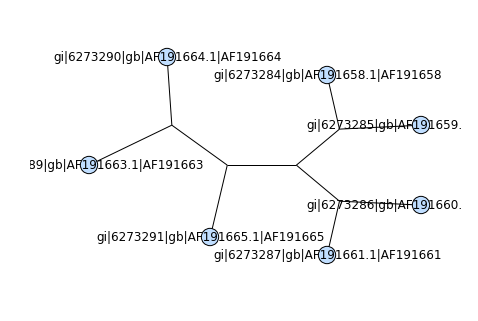

In [4]:
Phylo.draw_graphviz(tree)

In [18]:
align_c = AlignIO.read(open("data/opuntia-clustal.phy", "rU"), "phylip")
print "id           sequence (first 60 symbols)                                       length"
for record in align_c:
    print "%s - %s... - %d" % (record.id, record.seq[:60], len(record.seq))    

id           sequence (first 60 symbols)                                       length
gi|6273285 - TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273284 - TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273287 - TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273286 - TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273290 - TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273289 - TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273291 - TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906


## Usamos MUSCLE para la misma tarea de alineamiento múltiple

In [6]:
!muscle -in data/opuntia.fasta -phyiout data/opuntia-muscle.phy 


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

opuntia 7 seqs, max length 902, avg  length 896
00:00:00     10 MB(1%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     10 MB(1%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     17 MB(2%)  Iter   1  100.00%  Align node
00:00:00     17 MB(2%)  Iter   1  100.00%  Root alignment
00:00:00     17 MB(2%)  Iter   2  100.00%  Refine tree
00:00:00     17 MB(2%)  Iter   2  100.00%  Root alignment
00:00:00     17 MB(2%)  Iter   2  100.00%  Root alignment
00:00:00     17 MB(2%)  Iter   3  100.00%  Refine biparts
00:00:00     17 MB(2%)  Iter   4  100.00%  Refine biparts


In [19]:
align_m = AlignIO.read(open("data/opuntia-muscle.phy", "rU"), "phylip")
print "id           sequence (first 60 symbols)                                       length"
for record in align_m:
    print "%s - %s... - %d" % (record.id, record.seq[:60], len(record.seq)) 

id           sequence (first 60 symbols)                                       length
gi|6273289 - TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273291 - TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273290 - TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273287 - TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273286 - TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273285 - TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906
gi|6273284 - TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAAT... - 906


## Comparamos los resultados. Observa que ambos algoritmos de alineamiento no producen exactamente los mismos resultados

In [20]:
import numpy as np
def print_seqs(s1, s2, width=80, labels=("S1", "S2")):
    maxl = np.max((len(s1), len(s2)))
    for i in range(1+maxl/width):
        start_s1 = start_s2 = i*width
        end_s1   = end_s2   = (i+1)*width

        str_positions ="[%4d"%start_s1+":%4d"%end_s1+"]"
        
        start_s1 = start_s1 if len(s1)>start_s1 else len(s1)
        end_s1   = end_s1   if len(s1)>end_s1   else len(s1)
        start_s2 = start_s2 if len(s2)>start_s2 else len(s2)
        end_s2   = end_s2   if len(s2)>end_s2   else len(s2)

        print labels[0]+str_positions+":"+s1[start_s1:end_s1]
        print labels[1]+str_positions+":"+s2[start_s2:end_s2]
        print 
    
    
    
for rm in align_m:
    for rc in align_c:
        if rc.id==rm.id:
            print "--- alignment for "+rc.id+"---"
            print_seqs(rm.seq, rc.seq, labels=("muscle ", "clustal"))
            print "-------------------------------"
        

--- alignment for gi|6273289---
muscle [   0:  80]:TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAATCTAAATGATATAGGATTCCA
clustal[   0:  80]:TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAATCTAAATGATATAGGATTCCA

muscle [  80: 160]:CTATGTAAGGTCTTTGAATCATATCATAAAAGACAATGTAATAAAGCATGAATACAGATTCACACATAATTATCTGATAT
clustal[  80: 160]:CTATGTAAGGTCTTTGAATCATATCATAAAAGACAATGTAATAAAGCATGAATACAGATTCACACATAATTATCTGATAT

muscle [ 160: 240]:GAATCTATTCATAGAAAAAAGAAAAAAGTAAGAGCCTCCGGCCAATAAAGACTAAGAGGGTTGGCTCAAGAACAAAGTTC
clustal[ 160: 240]:GAATCTATTCATAGAAAAAAGAAAAAAGTAAGAGCCTCCGGCCAATAAAGACTAAGAGGGTTGGCTCAAGAACAAAGTTC

muscle [ 240: 320]:ATTAAGAGCTCCATTGTAGAATTCAGACCTAATCATTAATCAAGAAGCGATGGGAACGATGTAATCCATGAATACAGAAG
clustal[ 240: 320]:ATTAAGAGCTCCATTGTAGAATTCAGACCTAATCATTAATCAAGAAGCGATGGGAACGATGTAATCCATGAATACAGAAG

muscle [ 320: 400]:ATTCAATTGAAAAAGATCCTAATGATTCATTGGGAAGGATGGCGGAACGAACCAGAGACCAATTCATCTATTCTGAAAAG
clustal[ 320: 400]:ATTCAATTGAAAAAGATCCTAATGATTCATTGGGAAGGATGGCGG

## Compare execution times

In [32]:
%timeit !muscle -in data/opuntia.fasta -phyiout data/opuntia-muscle.phy 2> /dev/null

1 loops, best of 3: 536 ms per loop


In [33]:
%timeit !clustalw2 -INFILE=data/opuntia.fasta -OUTFILE=data/opuntia-clustal.phy -ALIGN -OUTPUT=PHYLIP > /dev/null

1 loops, best of 3: 898 ms per loop
